# Cities of the world batleship

In this project we are meant to put a lot of the knowledge we have gotten through the whole IBM data science specialization. My work is intended to exhibit the application of a methodology, the usage of the right tools, data processing, tools for visualization and to provide a final analysis to try to answer the initial questions. 

Feel free to check the report that goes along to this notebook in order to get a deeper understanding of the tasks performed here.

Import e install the necessary libraries.  

In [0]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if Nominatim is not installed
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if folium is not installed
import folium # map rendering library

#import BeautifulSoup 
from bs4 import BeautifulSoup 

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>

### 1. Retrieving and structuring data

I planned to download the files simply with the `wget` command. However, since I had missing file errors using wget I made it using requests and BeautifulSoup commands to load the data, then I converted it to a pandas DF. 

In [0]:
req = requests.get("https://lab.lmnixon.org/4th/worldcapitals.html") 
soup = BeautifulSoup(req.content,'lxml') 
table = soup.find_all('table')[0] 
df = pd.read_html(str(table)) 

InputDF=pd.DataFrame(df[0]) 
print (InputDF.shape)
#type(InputDF)
InputDF

(204, 4)


,0,1,2,3
0,Country,Capital,Latitude,Longitude
1,Afghanistan,Kabul,34.28N,69.11E
2,Albania,Tirane,41.18N,19.49E
3,Algeria,Algiers,36.42N,03.08E
4,American Samoa,Pago Pago,14.16S,170.43W
5,Andorra,Andorra la Vella,42.31N,01.32E
6,Angola,Luanda,08.50S,13.15E
7,Antigua and Barbuda,West Indies,17.20N,61.48W
8,Argentina,Buenos Aires,36.30S,60.00W
9,Armenia,Yerevan,40.10N,44.31E


Put names that were on first row as columns titles, and see the shape to know how many capitals I have.

In [0]:
InputDF.columns=['Country', 'Capital','Lat','Long']
print (InputDF.shape)
type(InputDF)
InputDF = InputDF.iloc[1:]
InputDF.head()

(204, 4)


,Country,Capital,Lat,Long
1,Afghanistan,Kabul,34.28N,69.11E
2,Albania,Tirane,41.18N,19.49E
3,Algeria,Algiers,36.42N,03.08E
4,American Samoa,Pago Pago,14.16S,170.43W
5,Andorra,Andorra la Vella,42.31N,01.32E


Add additional columns that will help to proccess the coordinates later.

In [0]:
Capitals=InputDF[['Country','Capital','Lat','Long']]
Capitals[['OldLat', 'OldLong']]=Capitals[['Lat', 'Long']]

Let's take a quick look at the data first rows.

In [0]:
Capitals.head()

,Country,Capital,Lat,Long,OldLat,OldLong
1,Afghanistan,Kabul,34.28N,69.11E,34.28N,69.11E
2,Albania,Tirane,41.18N,19.49E,41.18N,19.49E
3,Algeria,Algiers,36.42N,03.08E,36.42N,03.08E
4,American Samoa,Pago Pago,14.16S,170.43W,14.16S,170.43W
5,Andorra,Andorra la Vella,42.31N,01.32E,42.31N,01.32E


Eliminate letters in columns Lat and Long

In [0]:
Capitals['Lat']=Capitals['Lat'].str.slice(0, -1)
Capitals['Long']=Capitals['Long'].str.slice(0, -1)

In [0]:
Capitals.head()

,Country,Capital,Lat,Long,OldLat,OldLong
1,Afghanistan,Kabul,34.28,69.11,34.28N,69.11E
2,Albania,Tirane,41.18,19.49,41.18N,19.49E
3,Algeria,Algiers,36.42,03.08,36.42N,03.08E
4,American Samoa,Pago Pago,14.16,170.43,14.16S,170.43W
5,Andorra,Andorra la Vella,42.31,01.32,42.31N,01.32E


In [0]:
Capitals.dtypes

Country    object
Capital    object
Lat        object
Long       object
OldLat     object
OldLong    object
dtype: object

Eliminate rows with missing values (NaN)

In [0]:
Capitals=Capitals.dropna()

In [0]:
Capitals

,Country,Capital,Lat,Long,OldLat,OldLong
1,Afghanistan,Kabul,34.28,69.11,34.28N,69.11E
2,Albania,Tirane,41.18,19.49,41.18N,19.49E
3,Algeria,Algiers,36.42,03.08,36.42N,03.08E
4,American Samoa,Pago Pago,14.16,170.43,14.16S,170.43W
5,Andorra,Andorra la Vella,42.31,01.32,42.31N,01.32E
6,Angola,Luanda,08.50,13.15,08.50S,13.15E
7,Antigua and Barbuda,West Indies,17.20,61.48,17.20N,61.48W
8,Argentina,Buenos Aires,36.30,60.00,36.30S,60.00W
9,Armenia,Yerevan,40.10,44.31,40.10N,44.31E
10,Aruba,Oranjestad,12.32,70.02,12.32N,70.02W


Convert the coordinates to float values

In [0]:
Capitals['Lat'] = pd.to_numeric(Capitals['Lat'])
Capitals['Long'] = pd.to_numeric(Capitals['Long'])

I reset the table indexes. 

In [0]:
Capitals.reset_index(drop=True, inplace=True)

In [0]:
print(Capitals.head())
print (Capitals.shape)
Capitals.dtypes

          Country           Capital    Lat    Long  OldLat  OldLong
0     Afghanistan             Kabul  34.28   69.11  34.28N   69.11E
1         Albania            Tirane  41.18   19.49  41.18N   19.49E
2         Algeria           Algiers  36.42    3.08  36.42N   03.08E
3  American Samoa         Pago Pago  14.16  170.43  14.16S  170.43W
4         Andorra  Andorra la Vella  42.31    1.32  42.31N   01.32E
(199, 6)


Country     object
Capital     object
Lat        float64
Long       float64
OldLat      object
OldLong     object
dtype: object

Then I identify the coordinates orientation to make the respective coordinates negative ande eliminate the unnecesary last columns.

In [0]:
Capitals['OldLat'] = Capitals['OldLat'].str.strip().str[-1]
Capitals['OldLong'] = Capitals['OldLong'].str.strip().str[-1]


In [0]:
Capitals.head()

,Country,Capital,Lat,Long,OldLat,OldLong
0,Afghanistan,Kabul,34.28,69.11,N,E
1,Albania,Tirane,41.18,19.49,N,E
2,Algeria,Algiers,36.42,3.08,N,E
3,American Samoa,Pago Pago,14.16,170.43,S,W
4,Andorra,Andorra la Vella,42.31,1.32,N,E


In [0]:
Capitals['Lat'] = np.where(Capitals['OldLat'] == 'S', -1*Capitals['Lat'],Capitals['Lat'])
Capitals['Long'] = np.where(Capitals['OldLong'] == 'W', -1*Capitals['Long'],Capitals['Long'])
Capitals.head()

,Country,Capital,Lat,Long,OldLat,OldLong
0,Afghanistan,Kabul,34.28,69.11,N,E
1,Albania,Tirane,41.18,19.49,N,E
2,Algeria,Algiers,36.42,3.08,N,E
3,American Samoa,Pago Pago,-14.16,-170.43,S,W
4,Andorra,Andorra la Vella,42.31,1.32,N,E


In [0]:
Capitals

,Country,Capital,Lat,Long,OldLat,OldLong
0,Afghanistan,Kabul,34.28,69.11,N,E
1,Albania,Tirane,41.18,19.49,N,E
2,Algeria,Algiers,36.42,3.08,N,E
3,American Samoa,Pago Pago,-14.16,-170.43,S,W
4,Andorra,Andorra la Vella,42.31,1.32,N,E
5,Angola,Luanda,-8.50,13.15,S,E
6,Antigua and Barbuda,West Indies,17.20,-61.48,N,W
7,Argentina,Buenos Aires,-36.30,-60.00,S,W
8,Armenia,Yerevan,40.10,44.31,N,E
9,Aruba,Oranjestad,12.32,-70.02,N,W


Manually correct Jerusalem which has a wrong value from input data data

In [0]:
index_= Capitals[Capitals['Capital']=="Jerusalem"].index.values.astype(int)[0]#Capitals.index[Capitals[Capital] == "Jerusalem"]
print(index_)
Capitals['Long'][index_] = 35.10

91


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Eliminate the additional unnecesary columns. 

In [0]:
Capitals.drop(['OldLat', 'OldLong'], axis = 1, inplace=True) 
Capitals.head()#[0:5]

,Country,Capital,Lat,Long
0,Afghanistan,Kabul,34.28,69.11
1,Albania,Tirane,41.18,19.49
2,Algeria,Algiers,36.42,3.08
3,American Samoa,Pago Pago,-14.16,-170.43
4,Andorra,Andorra la Vella,42.31,1.32


World Map initial visualization of the cities

In [0]:
# create a worldmap using latitude and longitude values
world_map = folium.Map(location=[40.52, 34.34],zoom_start=2)
world_map

# add markers to map
for Lat, Long, Capital, Country in zip(Capitals['Lat'], Capitals['Long'], Capitals['Capital'],Capitals['Country']):
  #  label = '{}, {}'.format(neighborhood, borough)
    label = '{}, {}, {}, {}'.format(Capital, Country, Lat, Long)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [Lat, Long],
        radius=2, #ojo
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(world_map)  
    
world_map

Next, I will use the Foursquare API to explore the cities and segment them. So I create a function to define Foursquare Credentials and Version

In [0]:
def buildURL (CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, radius, LIMIT=1000):
    # create URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        latitude, 
        longitude, 
        radius, 
        LIMIT)
    return (url) # display URL

### 2. Data extraction and encoding

Define the funtion to extracts the category of each venue

In [0]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Define a function to lean the json and structure it into a *pandas* dataframe.

In [0]:
def get_nearby_venues(results):
    venues = results['response']['groups'][0]['items']

    nearby_venues = json_normalize(venues) # flatten JSON

    #print ("1**************************\n",nearby_venues)#quitar

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues =nearby_venues.loc[:, filtered_columns]

    #print ("2**************************\n",nearby_venues)#quitar

    # filter the category for each rowyy
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    #print ("3**************************\n",nearby_venues)#quitar

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    #print ("4**************************\n",nearby_venues)#quitar

    nearby_venues["name"] = nearby_venues["name"].str.lower()
    nearby_venues["categories"] = nearby_venues["categories"].str.lower()
    
    return (nearby_venues) 

Create a function to get each capital info, and explore the results. iterate over the table of cities, build the respective url and send the GET request. Then I explore the results to build a new dataframe with transformed data corresponding to each venue category. 

In [0]:
#building calls
def Get_Capitals_Info(Capitals):
    CLIENT_ID = '5KCQKMWUUFG2QNC2HJQE4QL3H2K3CRWFVORFSV0XO2FEVUIC' # your Foursquare ID
    CLIENT_SECRET = 'E0W2XTMVMGOT0Y2PL2MVFB2HPYK3ASESU4IHM4O014FEVXEM' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    List=['Airport','Culture','Food','Finance','Spectacle','Stores','Education','Tourism','Leisure','Lodging','Industry','Transport','Health', 'Empty','TotalResp']
    Capitals=pd.concat([Capitals,pd.DataFrame(columns=List)],sort=False)

    for index, row in Capitals.iterrows():
        #print(index, row["Lat"],row["Long"])
        url= buildURL (CLIENT_ID, CLIENT_SECRET, VERSION, latitude=row["Lat"], longitude=row["Long"], radius=40000, LIMIT=500) #1000
        results = requests.get(url).json()
       
        Capitals['TotalResp'][index]=results['response']['totalResults']
        if (results['response']['totalResults']==0) :
              Capitals['Empty'][index]=1
        else:
              nearby_venues=get_nearby_venues(results)
              #This next line allowed me to know the 15 most common words per capital ciry
              print(index, nearby_venues['categories'].value_counts()[:15].index.tolist()) #row["Lat"],row["Long"],
              print(Capitals['TotalResp'][index], " "+'{} venues returned by Fours filtered.'.format(nearby_venues.shape[0]))


              #Count categories appereance
              Capitals[List[0]][index]=nearby_venues.categories.str.count("airport|plane").sum() #1.Airport
              Capitals[List[1]][index]=nearby_venues.categories.str.count("art|museum|culture|opera").sum() #Culture:
              Capitals[List[2]][index]=nearby_venues.categories.str.count("pizza|burger|sandwich|cream|chicken|restaurant|coffee|bakery|bistro|diner|cafe|food|bbq|bakery|deli|bistro|butcher|breakfast|crepe").sum()#Food_Services
              Capitals[List[3]][index]=nearby_venues.categories.str.count("bank|finance|credit").sum() #Finance
              Capitals[List[4]][index]=nearby_venues.categories.str.count("stadium|theater|hall|event|scenic").sum()#5.Spectacle
              Capitals[List[5]][index]=nearby_venues.categories.str.count("store|shop|boutique|market").sum()#6.Stores
              Capitals[List[6]][index]=nearby_venues.categories.str.count("college|school|university").sum()# 7. Education
              Capitals[List[7]][index]=nearby_venues.categories.str.count("travel|tourist|tourism").sum()#8. Tourism
              Capitals[List[8]][index]=nearby_venues.categories.str.count("ski|spa|zoo|taverna|forest|nature|farm|waterfall|pub|plaza|historic|castle|mountain|sport|beach|trail|gym|club|music|fountain|pool|park|outdoor|lounge|garden|lake|monument|playground|plaza|aquarium|bar|church|mall|brewery").sum()# 9. LEisure
              Capitals[List[9]][index]=nearby_venues.categories.str.count("resort|hostel|hotel|bed|motel").sum()#10. Lodging
              Capitals[List[10]][index]=nearby_venues.categories.str.count("it service|building|distribution").sum()#11. Industry
              Capitals[List[11]][index]=nearby_venues.categories.str.count("train|transport|gas station|bus|rail|boat|marina|port").sum()#12. transport
              Capitals[List[12]][index]=nearby_venues.categories.str.count("hospital|pharmacy|health|clinic|dentist").sum()#13.health services

              #if (index == 8 ): break 
        
        
    return (Capitals)  

In [0]:
MisCapitals = Get_Capitals_Info(Capitals) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

0 ['hotel', 'afghan restaurant', 'pizza place', 'café', 'gym', 'shopping mall', 'bar', 'food', 'turkish restaurant', 'bakery', 'department store', 'burger joint', 'fried chicken joint', 'airport', 'italian restaurant']
23  23 venues returned by Fours filtered.
1 ['café', 'hotel', 'restaurant', 'seafood restaurant', 'italian restaurant', 'beach', 'eastern european restaurant', 'coffee shop', 'cocktail bar', 'mediterranean restaurant', 'french restaurant', 'food', 'lounge', 'dessert shop', 'bar']
104  100 venues returned by Fours filtered.
2 ['hotel', 'french restaurant', 'restaurant', 'burger joint', 'shopping mall', 'turkish restaurant', 'diner', 'indian restaurant', 'steakhouse', 'café', 'lounge', 'bar', 'campground', 'resort', 'cocktail bar']
61  61 venues returned by Fours filtered.
3 ['national park', 'bar', 'coffee shop', 'beach', 'pizza place', 'café']
6  6 venues returned by Fours filtered.
4 ['restaurant', 'ski area', 'hotel', 'mediterranean restaurant', 'spanish restaurant', '

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


38 ['park', 'ski area', 'bakery', 'pizza place', 'hotel', 'golf course', 'snack place', 'plaza', 'coffee shop', 'wine bar', 'museum', 'scenic lookout', 'hostel', 'spa', 'mountain']
171  100 venues returned by Fours filtered.
39 ['coffee shop', 'hotel', 'fast food restaurant', 'shopping mall', 'hotpot restaurant', 'train station', 'park', 'sandwich place', 'chinese restaurant', 'furniture / home store', 'zoo', 'warehouse store', 'history museum', 'pizza place', 'xinjiang restaurant']
52  52 venues returned by Fours filtered.
40 ['park', 'hotel', 'restaurant', 'italian restaurant', 'bakery', 'burger joint', 'french restaurant', 'coffee shop', 'bbq joint', 'scenic lookout', 'art museum', 'mexican restaurant', 'café', 'bookstore', 'mountain']
138  100 venues returned by Fours filtered.
41 ['hotel', 'airport', 'resort']
4  4 venues returned by Fours filtered.
42 ['hotel', 'café', 'fast food restaurant', 'restaurant', 'resort', 'lounge', 'nightclub', 'soccer stadium', 'supermarket', 'bar', '

In [0]:
MisCapitals.head()

,Country,Capital,Lat,Long,Airport,Culture,Food,Finance,Spectacle,Stores,Education,Tourism,Leisure,Lodging,Industry,Transport,Health,Empty,TotalResp
0,Afghanistan,Kabul,34.28,69.11,1,1,10,0,0,3,0,0,5,4,0,1,0,NaN,23
1,Albania,Tirane,41.18,19.49,0,1,58,0,0,9,0,0,21,13,0,0,0,NaN,104
2,Algeria,Algiers,36.42,3.08,1,3,27,0,0,5,0,0,9,9,0,1,0,NaN,61
3,American Samoa,Pago Pago,-14.16,-170.43,0,0,2,0,0,1,0,0,3,0,0,0,0,NaN,6
4,Andorra,Andorra la Vella,42.31,1.32,0,1,50,0,3,7,0,0,36,10,0,2,0,NaN,178


In [0]:
#check how many results were null
print (len(MisCapitals[MisCapitals['Empty']==1]))
print (MisCapitals.shape)

3
(199, 19)


Eliminate rows with empty results

In [0]:
MisCapitals.drop(MisCapitals[MisCapitals.Empty == 1].index, inplace=True)

In [0]:
#MisCapitals
print (MisCapitals.shape)

(196, 19)


I build the list of columns that are going to be added. And sum the amount of venues per row. 

In [0]:
List=['Airport','Culture','Food','Finance','Spectacle','Stores','Education','Tourism','Leisure','Lodging','Industry','Transport','Health']
MisCapitals['TotalVenues']=MisCapitals[List].sum(axis=1)

In [0]:
MisCapitals.head()

,Country,Capital,Lat,Long,Airport,Culture,Food,Finance,Spectacle,Stores,Education,Tourism,Leisure,Lodging,Industry,Transport,Health,Empty,TotalResp,TotalVenues
0,Afghanistan,Kabul,34.28,69.11,1,1,10,0,0,3,0,0,5,4,0,1,0,NaN,23,25.0
1,Albania,Tirane,41.18,19.49,0,1,58,0,0,9,0,0,21,13,0,0,0,NaN,104,102.0
2,Algeria,Algiers,36.42,3.08,1,3,27,0,0,5,0,0,9,9,0,1,0,NaN,61,55.0
3,American Samoa,Pago Pago,-14.16,-170.43,0,0,2,0,0,1,0,0,3,0,0,0,0,NaN,6,6.0
4,Andorra,Andorra la Vella,42.31,1.32,0,1,50,0,3,7,0,0,36,10,0,2,0,NaN,178,109.0


In [0]:
print (MisCapitals.shape)

(196, 20)


Want to check the rows with many lost data. 

In [0]:
Aux=MisCapitals[(MisCapitals.TotalResp- MisCapitals.TotalVenues)>29]
print (Aux[['Capital', 'TotalResp', 'TotalVenues']] )
print (" Returned ",Aux['TotalResp'].sum(), " Counted ",Aux['TotalVenues'].sum(), " Diff ",Aux['TotalResp'].sum() - Aux['TotalVenues'].sum())

                                        Capital TotalResp  TotalVenues
4                              Andorra la Vella       178        109.0
8                                       Yerevan       133         88.0
10                                     Canberra       175         94.0
11                                       Vienna       236         98.0
12                                         Baku       159        104.0
14                                       Manama       240        117.0
18                                     Brussels       238        102.0
25                                     Brasilia       152        100.0
28                                        Sofia       235        106.0
33                                       Ottawa       214        104.0
38                                     Santiago       171         92.0
40                                       Bogota       138        108.0
43                                     San Jose       146        115.0
47    

Eliminate the "Empty" column

In [0]:
MisCapitals.drop(['Empty'], axis = 1, inplace=True) 
MisCapitals.head()


,Country,Capital,Lat,Long,Airport,Culture,Food,Finance,Spectacle,Stores,Education,Tourism,Leisure,Lodging,Industry,Transport,Health,TotalResp,TotalVenues
0,Afghanistan,Kabul,34.28,69.11,1,1,10,0,0,3,0,0,5,4,0,1,0,23,25.0
1,Albania,Tirane,41.18,19.49,0,1,58,0,0,9,0,0,21,13,0,0,0,104,102.0
2,Algeria,Algiers,36.42,3.08,1,3,27,0,0,5,0,0,9,9,0,1,0,61,55.0
3,American Samoa,Pago Pago,-14.16,-170.43,0,0,2,0,0,1,0,0,3,0,0,0,0,6,6.0
4,Andorra,Andorra la Vella,42.31,1.32,0,1,50,0,3,7,0,0,36,10,0,2,0,178,109.0
5,Angola,Luanda,-8.50,13.15,0,0,40,0,2,5,0,0,11,4,0,2,0,54,64.0
6,Antigua and Barbuda,West Indies,17.20,-61.48,0,0,35,0,1,10,0,0,18,12,0,0,0,74,76.0
7,Argentina,Buenos Aires,-36.30,-60.00,0,0,1,0,0,0,0,0,1,0,0,1,0,2,3.0
8,Armenia,Yerevan,40.10,44.31,1,4,32,0,2,15,0,0,29,4,0,1,0,133,88.0
9,Aruba,Oranjestad,12.32,-70.02,0,2,41,0,2,9,0,0,28,19,1,1,0,120,103.0


I save data in a CSV file to avoid connecting so many times to the foursquare API.

In [0]:
# Guarda datos en CSV:
MisCapitals.to_csv('MisCapitales1.csv', header=False, index=False)
MisCapitals.to_csv('MisCapitales2.csv', header=True, index=False)
MisCapitals.to_csv('MisCapitales3.csv', header=True, index=True)
print ("Files generated")

Files generated


### 3. Data Preprocessing

Select columns useful for clusterization

In [0]:
MisCapitals.head()
Input = MisCapitals.iloc [:,4:17]
Input.head()

,Airport,Culture,Food,Finance,Spectacle,Stores,Education,Tourism,Leisure,Lodging,Industry,Transport,Health
0,1,1,10,0,0,3,0,0,5,4,0,1,0
1,0,1,58,0,0,9,0,0,21,13,0,0,0
2,1,3,27,0,0,5,0,0,9,9,0,1,0
3,0,0,2,0,0,1,0,0,3,0,0,0,0
4,0,1,50,0,3,7,0,0,36,10,0,2,0


Unfortunately, Foursquare did not returned more than 100 results for every city. I checked the finance column to see how many different values it had. 

In [0]:
Input['Finance'].nunique()

1

In [0]:
Input.drop(['Finance'], axis=1, inplace=True)

In [0]:
Input.head()

,Airport,Culture,Food,Spectacle,Stores,Education,Tourism,Leisure,Lodging,Industry,Transport,Health
0,1,1,10,0,3,0,0,5,4,0,1,0
1,0,1,58,0,9,0,0,21,13,0,0,0
2,1,3,27,0,5,0,0,9,9,0,1,0
3,0,0,2,0,1,0,0,3,0,0,0,0
4,0,1,50,3,7,0,0,36,10,0,2,0
5,0,0,40,2,5,0,0,11,4,0,2,0
6,0,0,35,1,10,0,0,18,12,0,0,0
7,0,0,1,0,0,0,0,1,0,0,1,0
8,1,4,32,2,15,0,0,29,4,0,1,0
9,0,2,41,2,9,0,0,28,19,1,1,0


I transform data. normalizing it before applying clustering algorithms.

In [0]:
def std_norm(df, column):
    c = df[column]
    df[column] = (c - c.mean())/c.std()

std_norm(Input, 'Health')
std_norm(Input, 'Transport')
std_norm(Input, 'Industry')
std_norm(Input, 'Lodging')
std_norm(Input, 'Leisure')
std_norm(Input, 'Tourism')
std_norm(Input, 'Education')
std_norm(Input, 'Stores')
std_norm(Input, 'Spectacle')
#std_norm(Input, 'Finance')
std_norm(Input, 'Food')
std_norm(Input, 'Culture')
std_norm(Input, 'Airport')

Input.head()

,Airport,Culture,Food,Spectacle,Stores,Education,Tourism,Leisure,Lodging,Industry,Transport,Health
0,0.384252,-0.351402,-0.87272,-0.859855,-0.790625,-0.210187,-0.234738,-0.952632,-0.344169,-0.289318,-0.417542,-0.308614
1,-0.491485,-0.351402,2.02342,-0.859855,-0.222303,-0.210187,-0.234738,0.162922,1.31009,-0.289318,-0.922717,-0.308614
2,0.384252,0.525985,0.152995,-0.859855,-0.601184,-0.210187,-0.234738,-0.673743,0.574865,-0.289318,-0.417542,-0.308614
3,-0.491485,-0.790096,-1.35541,-0.859855,-0.980066,-0.210187,-0.234738,-1.09208,-1.0794,-0.289318,-0.922717,-0.308614
4,-0.491485,-0.351402,1.54073,0.59719,-0.411744,-0.210187,-0.234738,1.20875,0.758671,-0.289318,0.0876324,-0.308614


To calculate the optimal number of clusters I iterate changing the number of clusters and calculating the silhouette score.

###4. Clustering Algorithm

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_(x, y): #, xlabel, ylabel
  
  plt.figure(figsize = (20,10))
  plt.xlabel("No. of clusters")
  plt.ylabel("Silhouette Score")
  plt.plot(x, y, '-o')
  plt.show()

In [0]:
#! /usr/bin/python
from sklearn.metrics import silhouette_samples, silhouette_score

[0.25116180711694014, 0.26962131939061157, 0.25192682777071385, 0.25165321177430217, 0.2760579781685934, 0.2738804394167761, 0.2947897086651005, 0.2965436401298364, 0.29869485342412766, 0.2765530557263623, 0.23848276671770519, 0.23304729710887928, 0.24952210555670207, 0.24791428525510167, 0.24023608309587166, 0.23759903910650593, 0.23768049169224914, 0.24494925415629074]


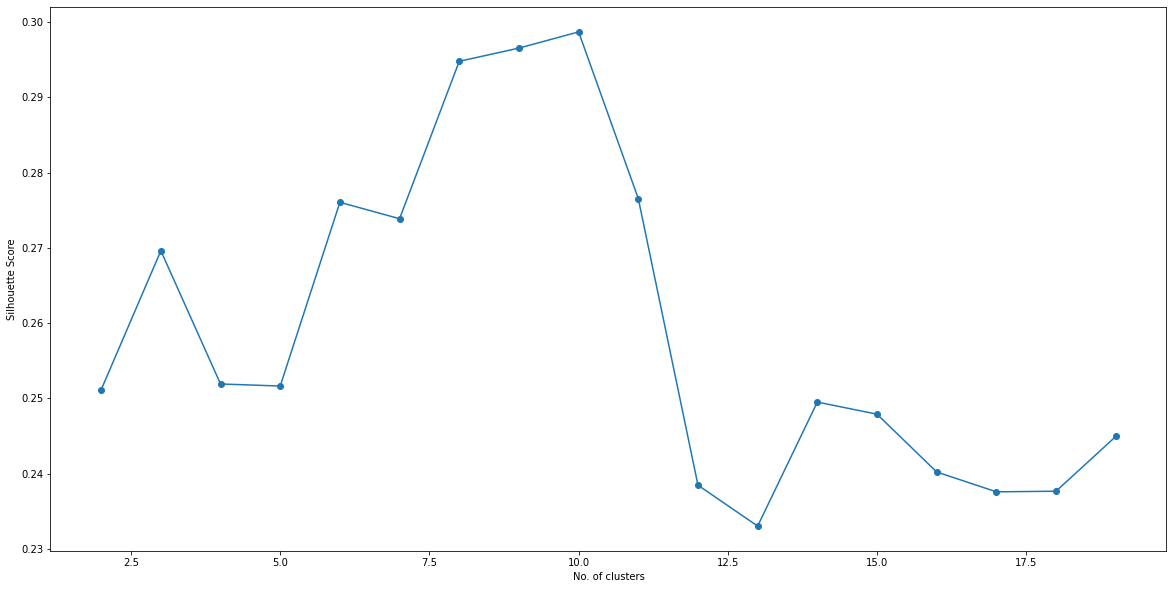

In [0]:
indices = []
scores = []
for kclusters in range(2, 20) :          #iterate over number of clusters
    kgc = Input
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kgc)
    score = silhouette_score(kgc, kmeans)
    indices.append(kclusters)
    scores.append(score)

print (scores)
plot_(indices, scores)
optimal_value = np.argmax(scores) + 2
print(optimal_value)

In [0]:
print(optimal_value)

10


After observing the reasons, I set the number of clusters in 8 instead of 10. Because the difference in performance between both values is very little.

In [0]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans_ = KMeans(n_clusters=kclusters, random_state=0).fit(Input)

# check cluster labels generated for each row in the dataframe
kmeans_.labels_[0:10] 

array([1, 4, 4, 1, 4, 4, 4, 1, 4, 5], dtype=int32)

Add clustering labels to the original dataset in an  new auxiliary dataset 

In [0]:
MisCapitalClassified=MisCapitals

In [0]:
MisCapitalClassified['PredictedLabels']=kmeans_.labels_

In [0]:
MisCapitalClassified.head()

,Country,Capital,Lat,Long,Airport,Culture,Food,Finance,Spectacle,Stores,Education,Tourism,Leisure,Lodging,Industry,Transport,Health,TotalResp,TotalVenues,PredictedLabels,Top1,Top2,Top3
0,Afghanistan,Kabul,34.28,69.11,1,1,10,0,0,3,0,0,5,4,0,1,0,23,25.0,1,Food,Leisure,Lodging
1,Albania,Tirane,41.18,19.49,0,1,58,0,0,9,0,0,21,13,0,0,0,104,102.0,4,Food,Leisure,Lodging
2,Algeria,Algiers,36.42,3.08,1,3,27,0,0,5,0,0,9,9,0,1,0,61,55.0,4,Food,Leisure,Lodging
3,American Samoa,Pago Pago,-14.16,-170.43,0,0,2,0,0,1,0,0,3,0,0,0,0,6,6.0,1,Leisure,Food,Stores
4,Andorra,Andorra la Vella,42.31,1.32,0,1,50,0,3,7,0,0,36,10,0,2,0,178,109.0,4,Food,Leisure,Lodging


Finally, let's visualize the resulting clusters

Create the map to show such clusters.

In [0]:
# create a worldmap using latitude and longitude values
map_clusters = folium.Map(location=[40.52, 34.34],zoom_start=2)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon,  capital, country, cluster in zip(MisCapitalClassified['Lat'], MisCapitalClassified['Long'], MisCapitalClassified['Capital'], MisCapitalClassified['Country'],MisCapitalClassified['PredictedLabels']):
    label = folium.Popup(capital +" "+country +' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)




map_clusters

### 5. Examining Clusters

Now, I examine each cluster and determine the discriminating venue categories that distinguish each cluster. 

First of all, I calculate the 3 most poular venues for each city. To make a comparison between clusters.

In [0]:
#nearby_venues['categories'].value_counts()[:15].index.tolist())
aux= MisCapitalClassified[['Airport','Culture','Food','Spectacle','Stores','Education',	'Tourism',	'Leisure',	'Lodging',	'Industry',	'Transport',	'Health']].apply(pd.to_numeric)

x=pd.DataFrame(aux).T
rslt = pd.DataFrame(np.zeros((0,3)), columns=['top1','top2','top3'])
for i in x.columns:
    df1row = pd.DataFrame(x.nlargest(3, i).index.tolist(), index=['top1','top2','top3']).T
    rslt = pd.concat([rslt, df1row], axis=0)



In [0]:
rslt.head()
rslt = rslt.reset_index()
rslt.head()
MisCapitalClassified['Top1']=rslt['top1']
MisCapitalClassified['Top2']=rslt['top2']
MisCapitalClassified['Top3']=rslt['top3']

In [0]:
MisCapitalClassified.head()

,Country,Capital,Lat,Long,Airport,Culture,Food,Finance,Spectacle,Stores,Education,Tourism,Leisure,Lodging,Industry,Transport,Health,TotalResp,TotalVenues,PredictedLabels,Top1,Top2,Top3
0,Afghanistan,Kabul,34.28,69.11,1,1,10,0,0,3,0,0,5,4,0,1,0,23,25.0,1,Food,Leisure,Lodging
1,Albania,Tirane,41.18,19.49,0,1,58,0,0,9,0,0,21,13,0,0,0,104,102.0,4,Food,Leisure,Lodging
2,Algeria,Algiers,36.42,3.08,1,3,27,0,0,5,0,0,9,9,0,1,0,61,55.0,4,Food,Leisure,Lodging
3,American Samoa,Pago Pago,-14.16,-170.43,0,0,2,0,0,1,0,0,3,0,0,0,0,6,6.0,1,Leisure,Food,Stores
4,Andorra,Andorra la Vella,42.31,1.32,0,1,50,0,3,7,0,0,36,10,0,2,0,178,109.0,4,Food,Leisure,Lodging


Here I separate each cluster to analyze it. 

In [0]:
MisCapitalClassified['ShortCapital'] =MisCapitalClassified['Capital'].str[:9]

In [0]:
aux0=MisCapitalClassified[ MisCapitalClassified['PredictedLabels']==0]
aux1=MisCapitalClassified[ MisCapitalClassified['PredictedLabels']==1]
aux2=MisCapitalClassified[ MisCapitalClassified['PredictedLabels']==2]
aux3=MisCapitalClassified[ MisCapitalClassified['PredictedLabels']==3]
aux4=MisCapitalClassified[ MisCapitalClassified['PredictedLabels']==4]
aux5=MisCapitalClassified[ MisCapitalClassified['PredictedLabels']==5]
aux6=MisCapitalClassified[ MisCapitalClassified['PredictedLabels']==6]
aux7=MisCapitalClassified[ MisCapitalClassified['PredictedLabels']==7]

Cluster 0

In [0]:
print(aux0[['Top1','Top2','Top3','ShortCapital']])

        Top1       Top2       Top3 ShortCapital
28      Food    Leisure     Stores        Sofia
40   Lodging    Airport  Transport       Bogota
73   Leisure       Food    Lodging        Accra
83      Food    Leisure     Stores    Tegucigal
101     Food    Leisure     Stores         Riga
120  Culture  Spectacle    Airport       Mexico
146  Leisure       Food     Stores       Warsaw


Cluster 1

In [0]:
print(aux1[['Top1','Top2','Top3','ShortCapital']])

          Top1       Top2       Top3 ShortCapital
0         Food    Leisure    Lodging        Kabul
3      Leisure       Food     Stores    Pago Pago
7         Food    Leisure  Transport    Buenos Ai
15        Food     Stores    Culture        Dhaka
20        Food    Leisure    Lodging    Porto Nov
24        Food     Stores    Leisure     Gaborone
27        Food     Stores    Leisure    Bandar Se
29        Food    Leisure    Lodging    Ouagadoug
30        Food    Lodging    Leisure    Bujumbura
31     Leisure       Food     Stores    Phnom Pen
32        Food     Stores    Leisure      Yaounde
34        Food    Leisure    Lodging        Praia
36     Airport       Food    Leisure       Bangui
41        Food    Lodging    Leisure       Moroni
42        Food    Leisure     Stores    Brazzavil
44        Food    Leisure     Stores    Yamoussou
51        Food    Leisure    Lodging     Djibouti
54        Food     Stores    Leisure         Dili
58     Airport       Food  Transport       Malabo


Cluster 2

In [0]:
print(aux2[['Top1','Top2','Top3','ShortCapital']])

        Top1     Top2       Top3 ShortCapital
10      Food  Leisure     Stores     Canberra
11   Leisure     Food     Stores       Vienna
18      Food  Leisure     Stores     Brussels
33      Food   Stores    Leisure       Ottawa
38      Food   Stores    Leisure     Santiago
48      Food  Leisure    Lodging       Prague
50      Food  Airport    Culture    Copenhage
55      Food   Stores    Leisure        Quito
56      Food  Leisure     Stores        Cairo
60      Food  Lodging    Leisure      Tallinn
66   Leisure   Stores       Food        Paris
72      Food  Leisure     Stores       Berlin
76      Food   Stores    Leisure    Basse-Ter
85      Food  Leisure    Lodging    Reykjavik
90   Leisure     Food    Lodging       Dublin
91      Food  Leisure     Stores    Jerusalem
94      Food  Leisure    Lodging        Amman
107     Food  Leisure     Stores      Vilnius
108     Food  Leisure    Lodging    Luxembour
127     Food  Leisure     Stores    Amsterdam
130     Food   Stores    Leisure  

Cluster 3

In [0]:
print(aux3[['Top1','Top2','Top3','ShortCapital']])

        Top1     Top2     Top3 ShortCapital
139     Food  Lodging  Leisure    Islamabad
141  Lodging     Food   Stores       Panama
148     Food   Stores  Leisure     San Juan
164   Stores  Airport  Culture    Bratislav


Cluster 4

In [0]:
print(aux4[['Top1','Top2','Top3','ShortCapital']])

        Top1     Top2       Top3 ShortCapital
1       Food  Leisure    Lodging       Tirane
2       Food  Leisure    Lodging      Algiers
4       Food  Leisure    Lodging    Andorra l
5       Food  Leisure     Stores       Luanda
6       Food  Leisure    Lodging    West Indi
8       Food  Leisure     Stores      Yerevan
13   Leisure     Food     Stores       Nassau
14      Food   Stores    Leisure       Manama
17      Food  Leisure     Stores        Minsk
21   Lodging  Leisure       Food      Thimphu
22      Food  Leisure     Stores    La Paz (a
25      Food  Leisure     Stores     Brasilia
26   Leisure     Food    Lodging    Road Town
35      Food  Leisure     Stores    George To
39      Food  Leisure     Stores      Beijing
43   Leisure     Food    Lodging     San Jose
46      Food  Leisure     Stores       Havana
47   Leisure     Food  Spectacle      Nicosia
57      Food   Stores     Health    San Salva
65   Leisure     Food     Stores     Helsinki
74   Airport     Food     Stores  

Cluster 5

In [0]:
print(aux5[['Top1','Top2','Top3','ShortCapital']])

        Top1       Top2     Top3 ShortCapital
9       Food    Leisure  Lodging    Oranjesta
12   Leisure       Food   Stores         Baku
45      Food    Leisure  Lodging       Zagreb
52      Food    Leisure   Stores       Roseau
53      Food     Stores  Leisure    Santo Dom
71   Leisure       Food   Stores     T'bilisi
88      Food     Stores  Leisure       Tehran
116     Food    Leisure  Lodging     Valletta
147     Food     Stores  Leisure       Lisbon
161     Food  Transport  Airport       Riyadh
171     Food    Leisure   Stores    Paramarib
177     Food     Stores  Leisure      Bangkok
186     Food    Leisure   Stores    Abu Dhabi
194     Food     Stores  Leisure      Caracas


Cluster 6

In [0]:
print(aux6[['Top1','Top2','Top3','ShortCapital']])

        Top1     Top2       Top3 ShortCapital
16      Food  Leisure     Stores    Bridgetow
23      Food  Leisure    Lodging     Sarajevo
63      Food   Stores    Leisure     Torshavn
96   Airport  Culture    Lodging      Nairobi
134  Leisure  Airport    Lodging     Kingston
172  Leisure     Food    Lodging    Mbabane (
189     Food  Leisure     Stores    Washingto
190  Lodging     Food  Transport    Charlotte


Cluster 7

In [0]:
print(aux7[['Top1','Top2','Top3','ShortCapital']])

        Top1     Top2     Top3 ShortCapital
19      Food  Leisure  Lodging     Belmopan
49   Leisure     Food   Stores     Kinshasa
64      Food  Leisure   Stores         Suva
81      Food   Stores  Leisure    Georgetow
87    Stores  Leisure     Food      Jakarta
109     Food  Culture   Stores        Macau
114  Airport  Culture     Food         Male
129  Leisure     Food   Stores       Noumea
150   Stores     Food  Leisure        Seoul
163  Leisure     Food   Stores     Freetown
191     Food  Leisure   Stores    Montevide
